## Import Library

In [10]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

#plt.rcParams['figure.figsize'] = [20, 7]

## load dataset

In [15]:
# данные тут https://disk.yandex.ru/i/3my__swzwW4d5Q

In [16]:
data = pd.read_csv(r'creditcard.csv')

In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [18]:
data.shape
data.Class.value_counts()

0.0    83077
1.0      201
Name: Class, dtype: int64

In [19]:
# separate fraudulent and non fraudulent data
data_0 = data[data['Class'] == 0]
data_1 = data[data['Class'] == 1]

In [21]:
data_0 = data_0.sample(n=9000)

In [22]:
data = data_1.append(data_0)

data.Class.value_counts()

0.0    9000
1.0     201
Name: Class, dtype: int64

In [23]:
# save as csv
data.to_csv('credit-card.csv')

In [24]:
# check the number of 1s and 0s
count = data['Class'].value_counts()

print('Fraudulent "1" :', count[1])
print('Not Fraudulent "0":', count[0])

# print the percentage of question where target == 1
print(count[1]/count[0]* 100)

Fraudulent "1" : 201
Not Fraudulent "0": 9000
2.2333333333333334


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


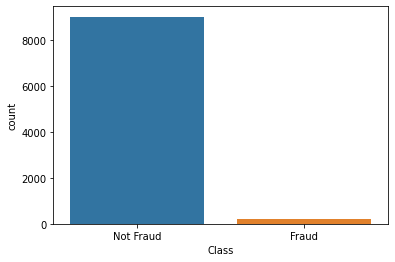

In [25]:
# plot the no of 1's and 0's
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])
plt.show()

## Respose and Target variable

In [28]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# check length of 1's and 0's
one = np.where(y==1)
zero = np.where(y==0)
len(one[0]), len(zero[0])

(201, 9000)

## Train test split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Fit the model uing Logitic Regression

In [90]:
# create the object
model =  LogisticRegression()

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

roc_auc_score(y_test, y_predict)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8798389746960236

In [91]:
confusion_matrix(y_test, y_predict)

array([[1781,    9],
       [  12,   39]])

## Boosting

In [107]:
# import linrary
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(x_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(x_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Roc auc score:', roc_auc_score(xgb_y_predict, y_test))

Roc auc score: 0.985869312155625


In [108]:
confusion_matrix(y_test, xgb_y_predict)

array([[1789,    1],
       [   9,   42]])

##  Resampling Technique

In [35]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()

# divie class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]

In [36]:
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (9000, 31)

class 1: (201, 31)


## 1. Random under sampling

total class of 1 and 0:
 0.0    201
1.0    201
Name: Class, dtype: int64


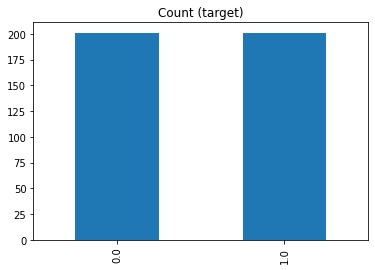

In [37]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n",test_under['Class'].value_counts())

test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## 2. Random over sampling

class count of 1 and 0:
 1.0    9000
0.0    9000
Name: Class, dtype: int64


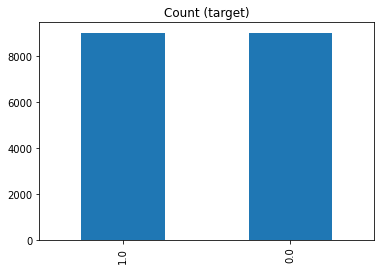

In [38]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_under = pd.concat([class_1_over, class_0], axis=0)

# print the number of class count
print('class count of 1 and 0:\n', test_under['Class'].value_counts())

# plot the count
test_under['Class'].value_counts().plot(kind='bar', title='Count (target)')
plt.show()

## Balance data with imbalance learn module

In [39]:
# import library
import imblearn

## 3. Random under-sampling with imblearn

In [88]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus, y_rus = rus.fit_resample(x_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0.0: 7210, 1.0: 150})
Resample dataset shape Counter({0.0: 150, 1.0: 150})


In [89]:
model.fit(x_rus, y_rus) 

predict = model.predict_proba(x_test)[:,1]

roc_auc_score(y_test, predict)

0.9431043925950268

## 4.Random over-sampling with imblearn

In [94]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros, y_ros = ros.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0.0: 7210, 1.0: 150})
Resample dataset shape Counter({0.0: 7210, 1.0: 7210})


In [95]:
model.fit(x_ros, y_ros) 

predict = model.predict_proba(x_test)[:,1]

roc_auc_score(y_test, predict)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9416036805783766

## 5. under-sampling Tomek links

In [96]:
# load library
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(x_train, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_tl))

Original dataset shape: Counter({0.0: 7210, 1.0: 150})
Resample dataset shape: Counter({0.0: 7172, 1.0: 150})


In [97]:
model.fit(x_tl, y_tl) 

predict = model.predict_proba(x_test)[:,1]

roc_auc_score(y_test, predict)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9075254682878738

## 6. Synthetic minority over-sampleing technique

In [98]:
# load library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit target and predictor variable
x_smote , y_smote = smote.fit_resample(x_train, y_train)

print('Origianl dataset shape:', Counter(y_train))
print('Resampple dataset shape:', Counter(y_smote))

Origianl dataset shape: Counter({0.0: 7210, 1.0: 150})
Resampple dataset shape: Counter({0.0: 7210, 1.0: 7210})


In [99]:
model.fit(x_smote, y_smote) 

predict = model.predict_proba(x_test)[:,1]

roc_auc_score(y_test, predict)

0.9271114032205061

## 7. NearMiss

In [100]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x_train, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0.0: 7210, 1.0: 150})
Resample dataset shape: Counter({0.0: 150, 1.0: 150})


In [101]:
model.fit(x_nm, y_nm) 

predict = model.predict_proba(x_test)[:,1]

roc_auc_score(y_test, predict)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9384160368057837

## 8. penalize algorithm (cost-sensitive training)

In [103]:
# load library
from sklearn.linear_model import LogisticRegression

# we can add class_weight='balanced' to add penalize mistake
model = LogisticRegression(class_weight='balanced')

model.fit(x_train, y_train)

predict = model.predict(x_test)

print('ROC-AUC score:',roc_auc_score(y_test, predict))

ROC-AUC score: 0.9151714317011721


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 10. Xgboost with best sampling technique

In [106]:
xgb_model = XGBClassifier().fit(x_rus, y_rus)

# predict
xgb_y_predict = xgb_model.predict(x_test)

print('Roc auc score:', roc_auc_score(xgb_y_predict, y_test))

Roc auc score: 0.7696163019079685
